
# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [2]:
# Basic Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns
from datetime import timedelta
# Mapping
import geopandas
import geopy
from geopy.geocoders import Nominatim
import folium
from geopy.extra.rate_limiter import RateLimiter
from folium import plugins
from folium.plugins import MarkerCluster
# Statistical OLS Regression Analysis
%matplotlib inline
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
#Scipy sklearn Predictions
from sklearn.ensemble import GradientBoostingRegressor

## Get the Data

In [3]:
df = pd.read_csv("Crime-rate-data.csv")
df=df.drop(0)

### Removing Some Improper rows from Dataset

In [4]:
t= list()
for i in range (df.shape[0]) :
    data  = df.iloc[i]['timestamp'].split('.')
    if len(data) > 1 :
        t.append(i+1)

In [5]:
df1 = df.drop(index=t)
df1.head()

timestamp act379 act13 act279 act323 act363 act302   latitude  \
1  28-02-2018 21:00      1     0      0      0      0      0   22.73726   
2  28-02-2018 21:15      1     0      0      0      0      0  22.720992   
3  28-02-2018 10:15      0     0      1      0      0      0  22.736676   
4  28-02-2018 10:15      0     0      1      0      0      0  22.746527   
5  28-02-2018 10:30      0     0      1      0      0      0  22.769531   

   longitude  
1  75.875987  
2  75.876083  
3  75.883168  
4  75.887139  
5  75.888772

In [6]:
# Convert time objects
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1['date'] = [d.date() for d in df1['timestamp']]
df1['time'] = [d.time() for d in df1['timestamp']]
# df1['Month'] = [d.month() for d in df1['timestamp']]
df1['day'] = df1['timestamp'].dt.day_name()
# Find Fractions of Day
df['timeint'] = (df1['timestamp']-df1['timestamp'].dt.normalize()).dt.total_seconds()/timedelta(days=1).total_seconds()
# Remove unfounded events
#df1 = df1[df1['disposition'] != 'Unfounded']

In [7]:
# df1['ACT379']=df1['act379']
# df1['ACT13-Gambling']=df1['act13']
# df1['ACT279-Accident']=df1['act279']
# df1['ACT323-Violence']=df1['act323']
# df1['ACT363-Kidnapping']=df1['act363']
# df1['ACT302-Murder']=df1['act302']

In [8]:
df1['Month'] = df1['timestamp'].apply(lambda time: time.month)
df1['weekdays'] = df1['timestamp'].apply(lambda time: time.day)
def hr_func(ts):
    return ts.hour

df1['hour'] = df1['timestamp'].apply(hr_func)
# df['Day1']=df1['timestamp'].dt.weekday
df1['year']=df1['timestamp'].dt.year
df1['weekofyear']=df1['timestamp'].dt.isocalendar().week
df1['Dayofyear']=df1['timestamp'].dt.dayofyear
df1['Dayofyear']=df1['timestamp'].dt.dayofyear
df1['weekday']=df1['timestamp'].dt.weekday
df1['quarter']=df1['timestamp'].dt.quarter

In [9]:
df1.head()
# df1['Month'].value_counts()

timestamp act379 act13 act279 act323 act363 act302   latitude  \
1 2018-02-28 21:00:00      1     0      0      0      0      0   22.73726   
2 2018-02-28 21:15:00      1     0      0      0      0      0  22.720992   
3 2018-02-28 10:15:00      0     0      1      0      0      0  22.736676   
4 2018-02-28 10:15:00      0     0      1      0      0      0  22.746527   
5 2018-02-28 10:30:00      0     0      1      0      0      0  22.769531   

   longitude        date      time        day  Month  weekdays  hour  year  \
1  75.875987  2018-02-28  21:00:00  Wednesday      2        28    21  2018   
2  75.876083  2018-02-28  21:15:00  Wednesday      2        28    21  2018   
3  75.883168  2018-02-28  10:15:00  Wednesday      2        28    10  2018   
4  75.887139  2018-02-28  10:15:00  Wednesday      2        28    10  2018   
5  75.888772  2018-02-28  10:30:00  Wednesday      2        28    10  2018   

   weekofyear  Dayofyear  weekday  quarter  
1           9         59        2        1  
2           9         59        2        1  
3           9         59        2        1  
4           9         59        2        1  
5           9         59        2        1

In [10]:
df1=df1.drop(['timestamp','time','date','day'],axis=1)

In [11]:
df1.head()

act379 act13 act279 act323 act363 act302   latitude  longitude  Month  \
1      1     0      0      0      0      0   22.73726  75.875987      2   
2      1     0      0      0      0      0  22.720992  75.876083      2   
3      0     0      1      0      0      0  22.736676  75.883168      2   
4      0     0      1      0      0      0  22.746527  75.887139      2   
5      0     0      1      0      0      0  22.769531  75.888772      2   

   weekdays  hour  year  weekofyear  Dayofyear  weekday  quarter  
1        28    21  2018           9         59        2        1  
2        28    21  2018           9         59        2        1  
3        28    10  2018           9         59        2        1  
4        28    10  2018           9         59        2        1  
5        28    10  2018           9         59        2        1

# Exploratory Data Analysis

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


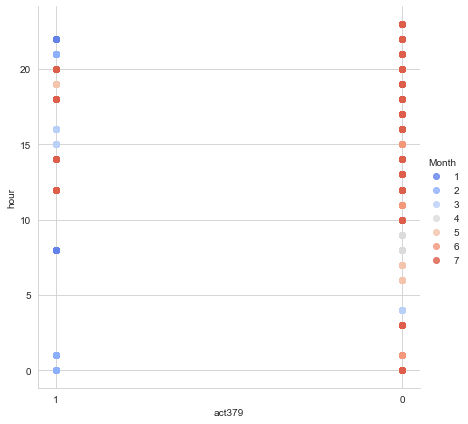

In [12]:
sns.set_style('whitegrid')
sns.lmplot('act379','hour',data=df1,hue='Month',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


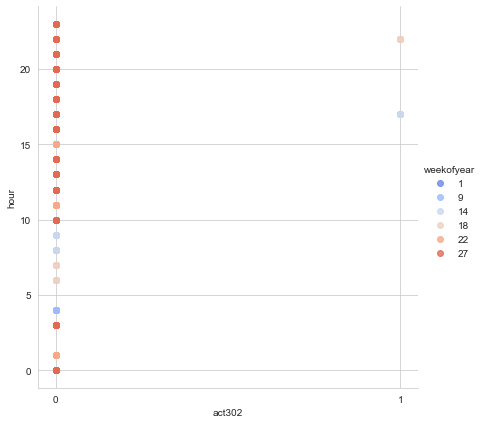

In [13]:
sns.set_style('whitegrid')
sns.lmplot('act302','hour',data=df1,hue='weekofyear',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [14]:
df1.groupby('act13')['act13'].count().sort_values()

act13
1      88
0    1980
Name: act13, dtype: int64

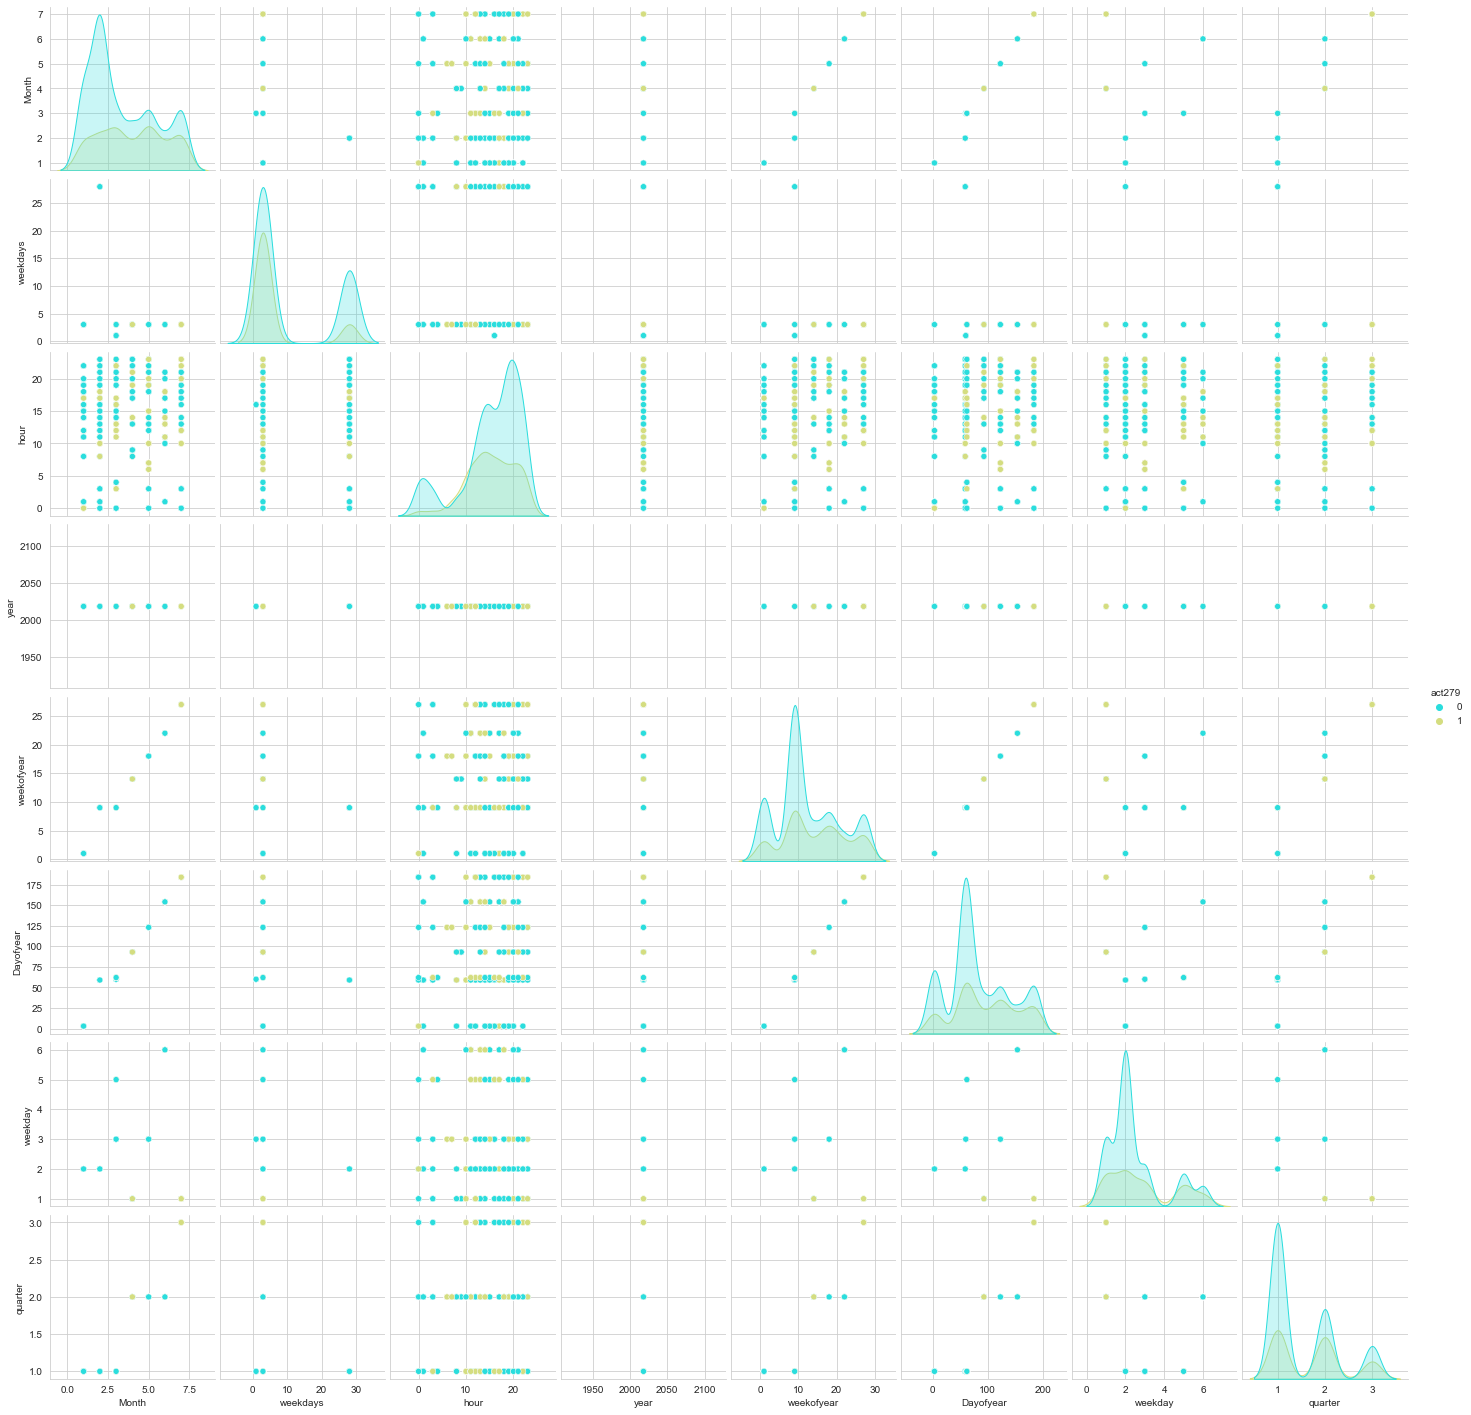

In [15]:
# df1.groupby("Month")["Month"].count().sort_values()
sns.pairplot(df1,hue='act279',palette='rainbow')

<AxesSubplot:xlabel='act13', ylabel='hour'>

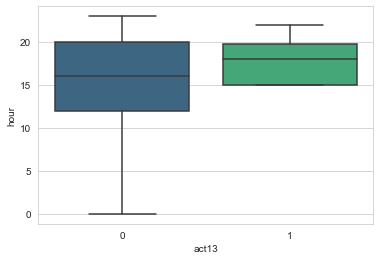

In [16]:
sns.boxplot(x='act13' ,y='hour' ,data=df1, palette='viridis')

<AxesSubplot:xlabel='act302', ylabel='hour'>

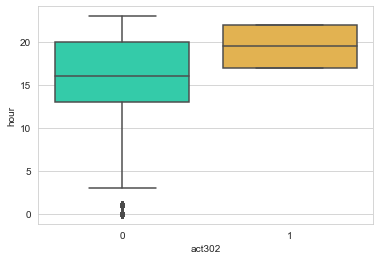

In [17]:
sns.boxplot(x='act302' ,y='hour' ,data=df1, palette='turbo')

<AxesSubplot:xlabel='act363', ylabel='hour'>

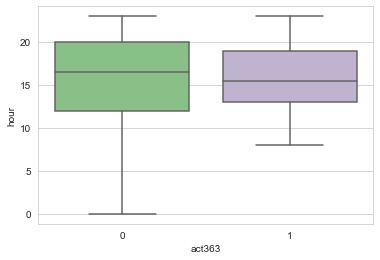

In [18]:
sns.boxplot(x='act363' ,y='hour' ,data=df1, palette='Accent')

<AxesSubplot:xlabel='act379', ylabel='hour'>

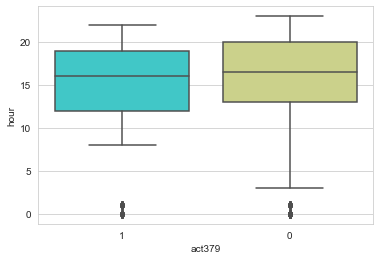

In [19]:
sns.boxplot(x='act379' ,y='hour' ,data=df1, palette='rainbow')

<AxesSubplot:xlabel='act279', ylabel='hour'>

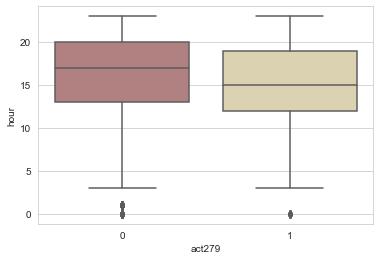

In [20]:
sns.boxplot(x='act279' ,y='hour' ,data=df1, palette='pink')

<AxesSubplot:xlabel='act13', ylabel='Month'>

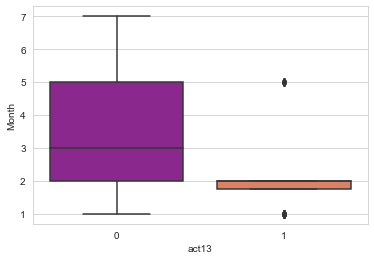

In [21]:
sns.boxplot(x='act13' ,y='Month' ,data=df1, palette='plasma')


Text(0, 0.5, 'MONTH')

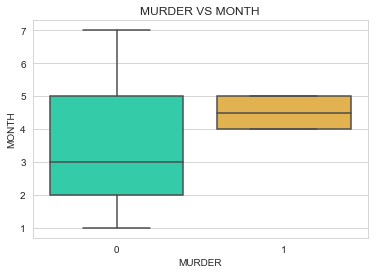

In [22]:
sns.boxplot(x='act302' ,y='Month' ,data=df1, palette='turbo')
plt.title('MURDER VS MONTH')
plt.xlabel('MURDER')
plt.ylabel('MONTH')

<AxesSubplot:xlabel='act379', ylabel='Month'>

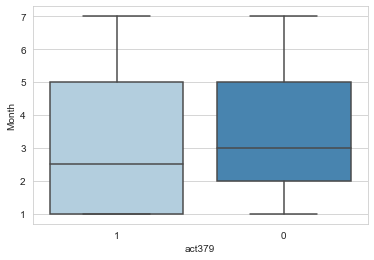

In [23]:
sns.boxplot(x='act379' ,y='Month' ,data=df1, palette='Blues')

In [24]:
df2 = pd.DataFrame(data=df1, columns=['hour','Month'])

<AxesSubplot:ylabel='Density'>

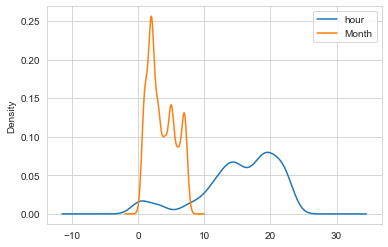

In [25]:
df2.plot.kde()

In [26]:
df1.head()

act379 act13 act279 act323 act363 act302   latitude  longitude  Month  \
1      1     0      0      0      0      0   22.73726  75.875987      2   
2      1     0      0      0      0      0  22.720992  75.876083      2   
3      0     0      1      0      0      0  22.736676  75.883168      2   
4      0     0      1      0      0      0  22.746527  75.887139      2   
5      0     0      1      0      0      0  22.769531  75.888772      2   

   weekdays  hour  year  weekofyear  Dayofyear  weekday  quarter  
1        28    21  2018           9         59        2        1  
2        28    21  2018           9         59        2        1  
3        28    10  2018           9         59        2        1  
4        28    10  2018           9         59        2        1  
5        28    10  2018           9         59        2        1

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [27]:
X=df1.iloc[:,[6,7,8,9,10,11,12,13,14,15]].values

In [28]:
X

array([['22.73726', '75.875987', 2, ..., 59, 2, 1],
       ['22.720992', '75.876083', 2, ..., 59, 2, 1],
       ['22.736676', '75.883168', 2, ..., 59, 2, 1],
       ...,
       ['22.531931', '75.769126', 7, ..., 184, 1, 3],
       ['22.719569', '75.857726', 7, ..., 184, 1, 3],
       ['22.686437', '76.032055', 7, ..., 184, 1, 3]], dtype=object)

In [29]:
y=df1.iloc[:,[0,1,2,3,4,5]].values

In [30]:
y

array([['1', '0', '0', '0', '0', '0'],
       ['1', '0', '0', '0', '0', '0'],
       ['0', '0', '1', '0', '0', '0'],
       ...,
       ['0', '0', '1', '0', '0', '0'],
       ['0', '0', '1', '0', '0', '0'],
       ['0', '0', '1', '0', '0', '0']], dtype=object)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)


## Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

knn = KNeighborsClassifier(n_neighbors=10)
classifier = MultiOutputClassifier(knn, n_jobs=-1)
classifier.fit(X,y)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=10), n_jobs=-1)

In [34]:
classifier.score(X_test,y_test)

0.9710144927536232

In [35]:
classifier.score(X_train,y_train)

0.9806529625151149

In [36]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

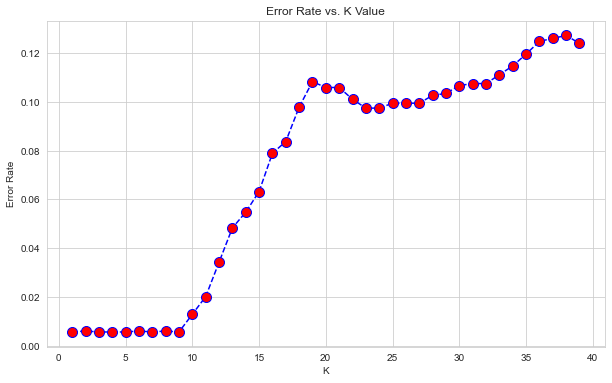

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## ***Support Vector machine for ACT379***

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = SVC()

In [39]:
y1=df1.iloc[:,[0]].values
y1

array([['1'],
       ['1'],
       ['0'],
       ...,
       ['0'],
       ['0'],
       ['0']], dtype=object)

In [40]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.20, random_state=50)

In [41]:
svc_model.fit(X1_train,y1_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [42]:
predictions = svc_model.predict(X1_test)
svc_model.score(X1_test,y1_test)

0.7922705314009661

In [43]:
print(confusion_matrix(y1_test,predictions))

[[328   0]
 [ 86   0]]


In [44]:
print(classification_report(y1_test,predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       328
           1       0.00      0.00      0.00        86

    accuracy                           0.79       414
   macro avg       0.40      0.50      0.44       414
weighted avg       0.63      0.79      0.70       414



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision tree Classifier

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
Dclassifier = MultiOutputClassifier(dtree, n_jobs=-1)
Dclassifier.fit(X,y)

MultiOutputClassifier(estimator=DecisionTreeClassifier(), n_jobs=-1)

In [46]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
pred= dtree.predict(X_test)

In [48]:
Dclassifier.score(X_test,y_test)

0.9710144927536232

In [49]:
Dclassifier.score(X_train,y_train)

0.9806529625151149

## Random Forest Classifier  

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [50]:
from sklearn.ensemble import RandomForestClassifier

rtc=RandomForestClassifier(n_estimators=200,) #The number of trees in the forest.
Rclassifier = MultiOutputClassifier(rtc, n_jobs=-1)
Rclassifier.fit(X,y)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=200),
                      n_jobs=-1)

In [51]:
Rclassifier.fit(X_train,y_train)
R_pred=Rclassifier.predict(X_test)

In [52]:
Rclassifier.score(X_test,y_test)

0.9806763285024155

In [53]:
Rclassifier.score(X_train,y_train)

0.9915356711003628

## Result of all the classifier

In [54]:
print(classifier.score(X_test,y_test))

print(Rclassifier.score(X_test,y_test))

print(svc_model.score(X1_test,y1_test))

print(Dclassifier.score(X_test,y_test))

0.9710144927536232
0.9806763285024155
0.7922705314009661
0.9710144927536232


In [55]:
 #Predict using Random Classifier method

In [56]:
timestamp = pd.Timestamp(input("Enter the timestamp (YYYY-MM-DD HH:MM:SS): "))

latitude = float(input("Enter the latitude: "))
longitude = float(input("Enter the longitude: "))

month = timestamp.month
weekdays = timestamp.weekday()
hour = timestamp.hour
year = timestamp.year
weekofyear = timestamp.weekofyear
dayofyear = timestamp.dayofyear
weekday = timestamp.weekday()
quarter = timestamp.quarter


# Create a new DataFrame with the user input
new_data = pd.DataFrame({
    'latitude': [latitude],
    'longitude': [longitude],
    'Month': [month],
    'weekdays': [weekdays],
    'hour': [hour],
    'year': [year],
    'weekofyear': [weekofyear],
    'Dayofyear': [dayofyear],
    'weekday': [weekday],
    'quarter': [quarter]
})



Enter the timestamp (YYYY-MM-DD HH:MM:SS): 2023-05-20 20:36:00
Enter the latitude: 22.73726
Enter the longitude: 75.875987


In [57]:
new_predictions = Rclassifier.predict(new_data)

crime_names = ['theft', 'gambling', 'Accident','violence','kidnap','murder']

print("New Prediction", new_predictions)
print("Crimes:", crime_names)


New Prediction [['0' '0' '0' '1' '0' '0']]
Crimes: ['theft', 'gambling', 'Accident', 'violence', 'kidnap', 'murder']


In [58]:
df1

act379 act13 act279 act323 act363 act302   latitude  longitude  Month  \
1         1     0      0      0      0      0   22.73726  75.875987      2   
2         1     0      0      0      0      0  22.720992  75.876083      2   
3         0     0      1      0      0      0  22.736676  75.883168      2   
4         0     0      1      0      0      0  22.746527  75.887139      2   
5         0     0      1      0      0      0  22.769531  75.888772      2   
...     ...   ...    ...    ...    ...    ...        ...        ...    ...   
2086      0     0      0      1      0      0   22.71297   75.82358      7   
2087      0     0      0      1      0      0  22.693481  75.821483      7   
2088      0     0      1      0      0      0  22.531931  75.769126      7   
2089      0     0      1      0      0      0  22.719569  75.857726      7   
2090      0     0      1      0      0      0  22.686437  76.032055      7   

      weekdays  hour  year  weekofyear  Dayofyear  weekday  quarter  
1           28    21  2018           9         59        2        1  
2           28    21  2018           9         59        2        1  
3           28    10  2018           9         59        2        1  
4           28    10  2018           9         59        2        1  
5           28    10  2018           9         59        2        1  
...        ...   ...   ...         ...        ...      ...      ...  
2086         3     3  2018          27        184        1        3  
2087         3    21  2018          27        184        1        3  
2088         3    12  2018          27        184        1        3  
2089         3    10  2018          27        184        1        3  
2090         3    23  2018          27        184        1        3  

[2068 rows x 16 columns]

In [59]:
df1['theft'] = df1['act379'].replace('1','theft')
df1['gambling'] = df1['act13'].replace('1','gambling')
df1['accident'] = df1['act279'].replace('1','accident')
df1['violence'] = df1['act323'].replace('1','violence')
df1['kidnap'] = df1['act363'].replace('1','kidnap')
df1['murder'] = df1['act302'].replace('1','murder')
df1['crime_type'] = df1['theft'] + df1['gambling']+df1['accident'] + df1['violence']+df1['kidnap'] + df1['murder']

In [60]:
df1['crime_type']=df1['crime_type'].str.replace('0','')
df1.drop(['theft','gambling','accident','violence','kidnap','murder'],inplace=True,axis=1)
df1.head()

act379 act13 act279 act323 act363 act302   latitude  longitude  Month  \
1      1     0      0      0      0      0   22.73726  75.875987      2   
2      1     0      0      0      0      0  22.720992  75.876083      2   
3      0     0      1      0      0      0  22.736676  75.883168      2   
4      0     0      1      0      0      0  22.746527  75.887139      2   
5      0     0      1      0      0      0  22.769531  75.888772      2   

   weekdays  hour  year  weekofyear  Dayofyear  weekday  quarter crime_type  
1        28    21  2018           9         59        2        1      theft  
2        28    21  2018           9         59        2        1      theft  
3        28    10  2018           9         59        2        1   accident  
4        28    10  2018           9         59        2        1   accident  
5        28    10  2018           9         59        2        1   accident

In [62]:
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Indore , Rajasthan , India')
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.5)

In [63]:
df1.groupby("crime_type")["crime_type"].count().sort_values()

crime_type
murder       22
gambling     88
kidnap      110
theft       396
accident    682
violence    770
Name: crime_type, dtype: int64

In [64]:
# Mark events with names on map
m = folium.Map([22.7196,75.8577], zoom_start=14)
for index, row in df1.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=4,
                        popup=row['crime_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)
m


In [65]:
# convert to (n, 2) nd-array format for heatmap
dfmatrix = df1[['latitude', 'longitude']].values
# plot heatmap
m.add_child(plugins.HeatMap(dfmatrix, radius=15))
m
